In [74]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/jbonet/Desktop/EMIBA/BDP/data/albaranes_de_venta/datos_limipios/datos_columnas_reducidas_13Sep.tsv', sep='\t')

/home/jbonet/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Cod_Grupo,Numero_albaran,Fecha_Albaran,Nombre_Comercial,Numero de Factura,Direccion Cliente,Documento,Codigo de Articulo,Nombre Articulo,Cantidad Pedida,Precio Unitario,Descuento aplicado,Total Producto (Cantidad x Precio x Dto),Descripcion Familia de Articulo,Descripcion Sub-Familia Articulos,Diferencia Caducidad,Tipo de Producto
0,38.0,7859,2019-08-27,"COMERCIAL TILMAD, S.L.",11171.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2019/01/0007859/0000001,232,BURRATA DA 250 GR,10.0,9.85,0.00,98.50,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco
1,38.0,1962,2019-03-06,"COMERCIAL TILMAD, S.L.",3590.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2019/01/0001962/0000001,232,BURRATA DA 250 GR,6.0,9.85,0.00,59.10,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco
2,38.0,11613,2018-12-18,"COMERCIAL TILMAD, S.L.",16755.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2018/01/0011613/0000002,231,BURRATINA DA 125 GR,40.0,9.85,0.00,394.00,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco
3,38.0,1949,2017-03-21,"COMERCIAL TILMAD, S.L.",3256.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2017/01/0001949/0000003,9002,MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG,40.0,4.85,13.98,166.88,QUESOS,MOZZARELLA PER PIZZA,0.0,Ultra Fresco
4,38.0,2145,2017-03-28,"COMERCIAL TILMAD, S.L.",3256.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2017/01/0002145/0000004,9002,MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG,50.0,4.85,13.98,208.60,QUESOS,MOZZARELLA PER PIZZA,0.0,Ultra Fresco


In [4]:
df['year'] = pd.to_datetime(df['Fecha_Albaran']).dt.year

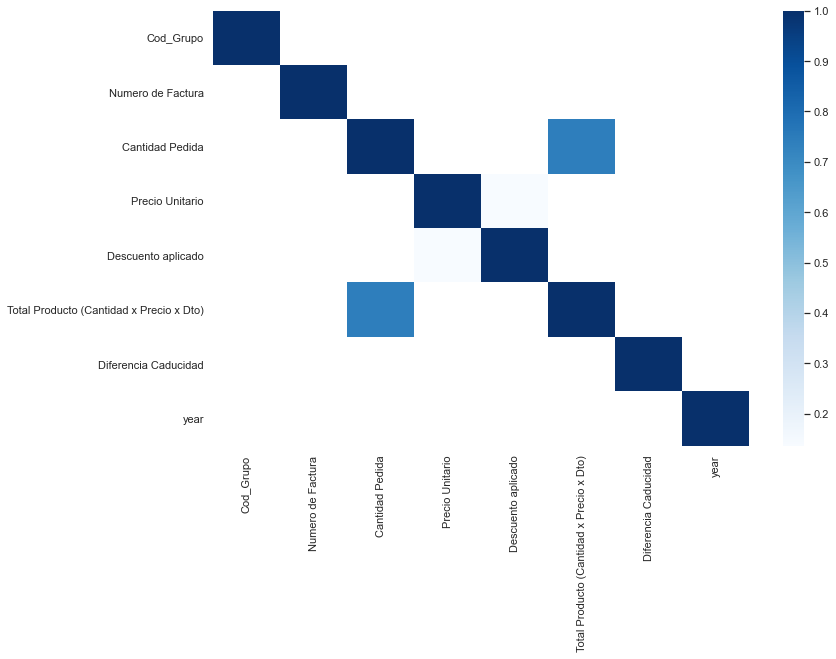

In [62]:
corr = df.corr()
kot = corr[corr>=0.1]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")
plt.show()

In [5]:
def group_discount_50(df):
    df_toplot = pd.DataFrame()
    for i, j in [(0,49), (50, 100)]:
        
        int_df = pd.DataFrame(df[(df['Descuento aplicado'] >= i) & \
            (df['Descuento aplicado'] <= j)].groupby(['Tipo de Producto', 'year']).apply(
                lambda x: x['Cantidad Pedida'].sum())).reset_index()
        
        int_df['Descuento'] = '{}-{}%'.format(i,j)
        df_toplot = pd.concat([df_toplot, int_df])

    rel_df = pd.DataFrame()
    for k, l in df_toplot.groupby(['Tipo de Producto', 'year']):
        l['Relative_counts'] = l[0] / df[(df['Tipo de Producto'] == k[0]) & (df['year'] == k[1])]['Cantidad Pedida'].sum()
        rel_df = pd.concat([rel_df, l])

    return rel_df

In [6]:
def analyze_products(df):
    df = df[df['Descuento aplicado'] >= 50]
    import pdb;pdb.set_trace()
    return df.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

In [7]:
df_discount = group_discount_50(df)

/home/jbonet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_discount.head()

,Tipo de Producto,year,0,Descuento,Relative_counts
0,Fresco,2015,942727.769,0-49%,0.997320
0,Fresco,2015,2475.515,50-100%,0.002619
1,Fresco,2016,1038366.762,0-49%,0.997707
1,Fresco,2016,2053.513,50-100%,0.001973
2,Fresco,2017,1110714.291,0-49%,0.996208


In [9]:
df_products = analyze_products(df)

In [41]:
df_products[df_products['Tipo de Producto'] == 'Fresco']

,Tipo de Producto,Descripcion Sub-Familia Articulos,0
0,Fresco,ALTRI FORMAGGI GRATTUGIATI,9.000
1,Fresco,BIRRE,36.000
2,Fresco,BOCCONCINI,4588.000
3,Fresco,BUFALA E BURRATA,4434.250
4,Fresco,CONSERVE,44.836
5,Fresco,FARINE,10.000
6,Fresco,FORMAGGI DURI,274.287
7,Fresco,FORMAGGI MORBIDI,5953.918
8,Fresco,FORMAGGI SPECIALIT¿,719.891
9,Fresco,FORMAGGI SPECIALITÀ,1446.101


In [19]:
def plot_products_discounted(df, output):

    sns.set(rc={'figure.figsize':(7,5)})
    sns.set_style('whitegrid')

    for i, j in df.groupby('Tipo de Producto'):
        j = j.sort_values(by=0, ascending=False)

        palette = sns.color_palette("Blues",n_colors=j.shape[0])
        palette.reverse()
        ax = sns.barplot(data=j, x=0, y='Descripcion Sub-Familia Articulos', palette=palette, orient='h')

        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set_xlabel("Cantidad de Producto", fontsize=12)
        ax.set_ylabel("Subfamilia de Producto", fontsize=12)
        
        plt.title(i, fontsize=20)
        plt.tight_layout()
        #plt.savefig('Discounted_products_{}.pdf'.format(i))
        #plt.close()
        plt.show()

In [20]:
df_products.head()

,Tipo de Producto,Descripcion Sub-Familia Articulos,0
0,Fresco,ALTRI FORMAGGI GRATTUGIATI,9.000
1,Fresco,BIRRE,36.000
2,Fresco,BOCCONCINI,4588.000
3,Fresco,BUFALA E BURRATA,4434.250
4,Fresco,CONSERVE,44.836


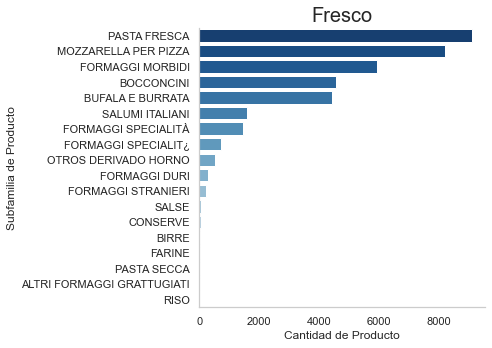

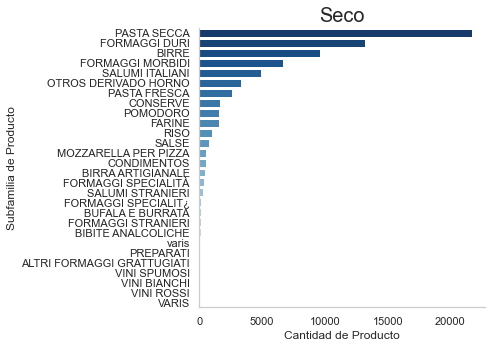

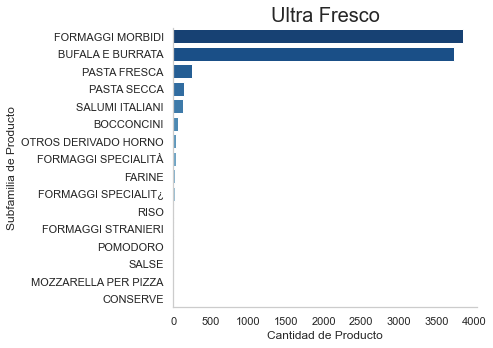

In [21]:
output = ''
plot_products_discounted(df_products, output)

In [112]:
def plot_evolution_discount(df, output):

    sns.set(rc={'figure.figsize':(7,5)})
    sns.set_style('whitegrid')

    for i, j in df.groupby('Descuento'):
        ax = sns.barplot(data=j, x='year', y='Relative_counts', 
            hue='Tipo de Producto', hue_order=['Seco', 'Fresco', 'Ultra Fresco'])

        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.savefig('evolution_discount_{}.pdf'.format(i))
        plt.close()

In [113]:
plot_evolution_discount(df_discount, output)

In [117]:
df[df['Diferencia Caducidad'] < 0].iloc[0]

Cod_Grupo                                                                                  38
Numero_albaran                                                                           7921
Fecha_Albaran                                                                      2016-10-25
Nombre_Comercial                                                       COMERCIAL TILMAD, S.L.
Numero de Factura                                                                       11363
Direccion Cliente                           000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...
Documento                                                             2016/01/0007921/0000005
Codigo de Articulo                                                                        846
Nombre Articulo                                                RICOTTA IN VASCHETTA DA 1.5 KG
Cantidad Pedida                                                                             3
Precio Unitario                                             

In [121]:
df[df['Diferencia Caducidad'] > 3000].shape

(133, 18)

In [122]:
df.isna().sum()

Cod_Grupo                                       0
Numero_albaran                                  0
Fecha_Albaran                                   0
Nombre_Comercial                             5092
Numero de Factura                           16000
Direccion Cliente                               0
Documento                                       0
Codigo de Articulo                              0
Nombre Articulo                                 5
Cantidad Pedida                                 0
Precio Unitario                                 0
Descuento aplicado                              0
Total Producto (Cantidad x Precio x Dto)        0
Descripcion Familia de Articulo                 0
Descripcion Sub-Familia Articulos               0
Diferencia Caducidad                            0
Tipo de Producto                                0
year                                            0
dtype: int64

In [23]:
df.shape

(1296226, 18)

In [24]:
df.head()

,Cod_Grupo,Numero_albaran,Fecha_Albaran,Nombre_Comercial,Numero de Factura,Direccion Cliente,Documento,Codigo de Articulo,Nombre Articulo,Cantidad Pedida,Precio Unitario,Descuento aplicado,Total Producto (Cantidad x Precio x Dto),Descripcion Familia de Articulo,Descripcion Sub-Familia Articulos,Diferencia Caducidad,Tipo de Producto,year
0,38.0,7859,2019-08-27,"COMERCIAL TILMAD, S.L.",11171.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2019/01/0007859/0000001,232,BURRATA DA 250 GR,10.0,9.85,0.00,98.50,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco,2019
1,38.0,1962,2019-03-06,"COMERCIAL TILMAD, S.L.",3590.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2019/01/0001962/0000001,232,BURRATA DA 250 GR,6.0,9.85,0.00,59.10,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco,2019
2,38.0,11613,2018-12-18,"COMERCIAL TILMAD, S.L.",16755.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2018/01/0011613/0000002,231,BURRATINA DA 125 GR,40.0,9.85,0.00,394.00,QUESOS,BUFALA E BURRATA,13.0,Ultra Fresco,2018
3,38.0,1949,2017-03-21,"COMERCIAL TILMAD, S.L.",3256.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2017/01/0001949/0000003,9002,MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG,40.0,4.85,13.98,166.88,QUESOS,MOZZARELLA PER PIZZA,0.0,Ultra Fresco,2017
4,38.0,2145,2017-03-28,"COMERCIAL TILMAD, S.L.",3256.0,"000 - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...",2017/01/0002145/0000004,9002,MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG,50.0,4.85,13.98,208.60,QUESOS,MOZZARELLA PER PIZZA,0.0,Ultra Fresco,2017


In [32]:
df.columns

Index(['Cod_Grupo', 'Numero_albaran', 'Fecha_Albaran', 'Nombre_Comercial',
       'Numero de Factura', 'Direccion Cliente', 'Documento',
       'Codigo de Articulo', 'Nombre Articulo', 'Cantidad Pedida',
       'Precio Unitario', 'Descuento aplicado',
       'Total Producto (Cantidad x Precio x Dto)',
       'Descripcion Familia de Articulo', 'Descripcion Sub-Familia Articulos',
       'Diferencia Caducidad', 'Tipo de Producto', 'year'],
      dtype='object')

In [52]:
df_low_disc = df[df['Descuento aplicado'] < 50]
df_high_disc = df[df['Descuento aplicado'] >= 50]

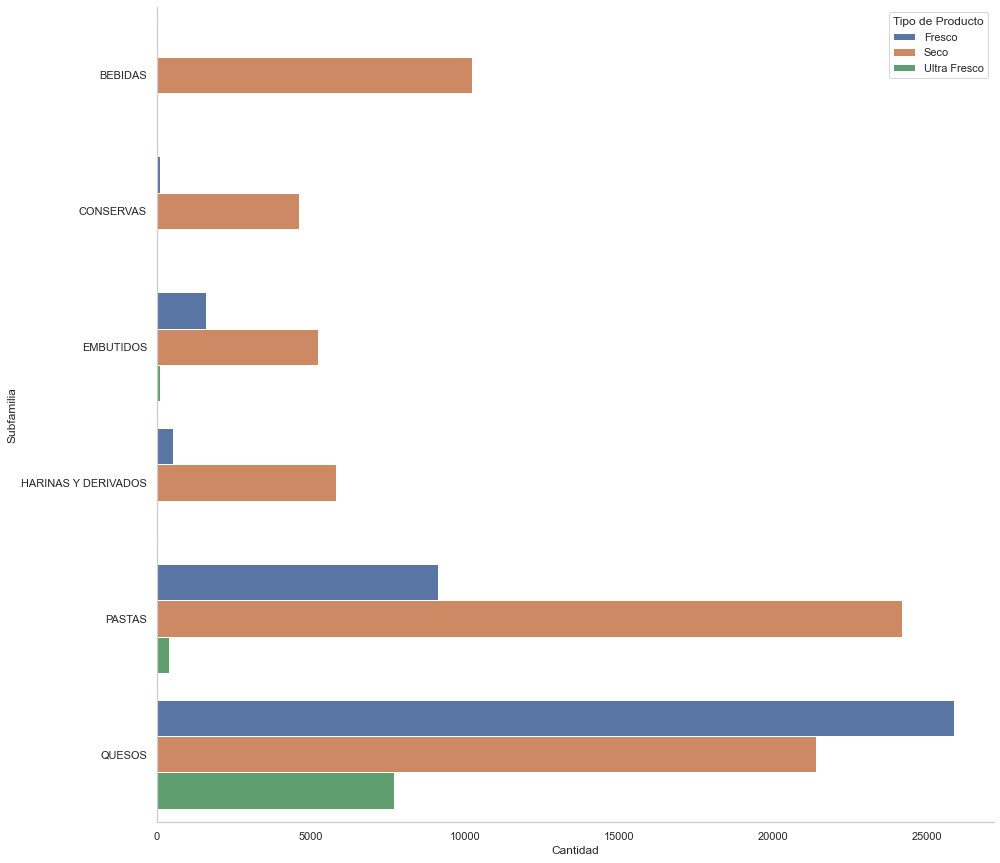

In [55]:
df_high_cant = df_high_disc.groupby(['Tipo de Producto', 'Descripcion Familia de Articulo']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

ax = sns.barplot(data=df_high_cant, x=0, y='Descripcion Familia de Articulo', hue='Tipo de Producto')

ax.set_xlabel("Cantidad")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

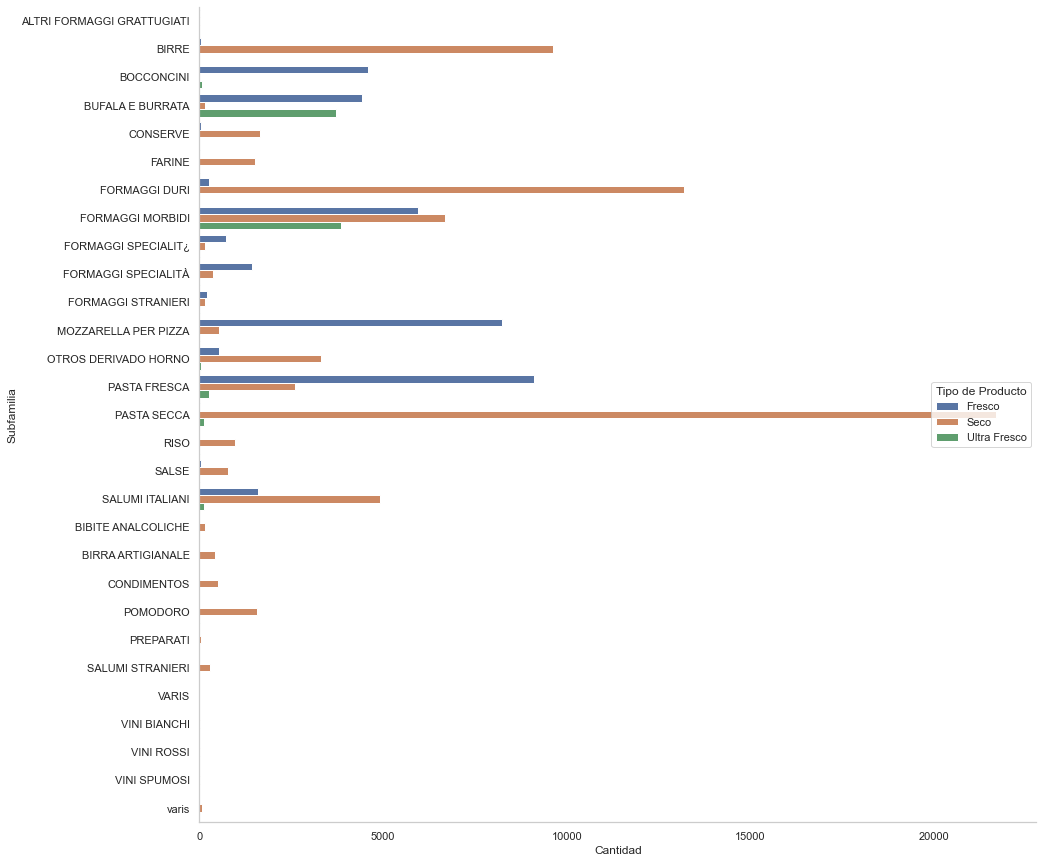

In [54]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_cant = df_high_disc.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

ax = sns.barplot(data=df_high_cant, x=0, y='Descripcion Sub-Familia Articulos', hue='Tipo de Producto')

ax.set_xlabel("Cantidad")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

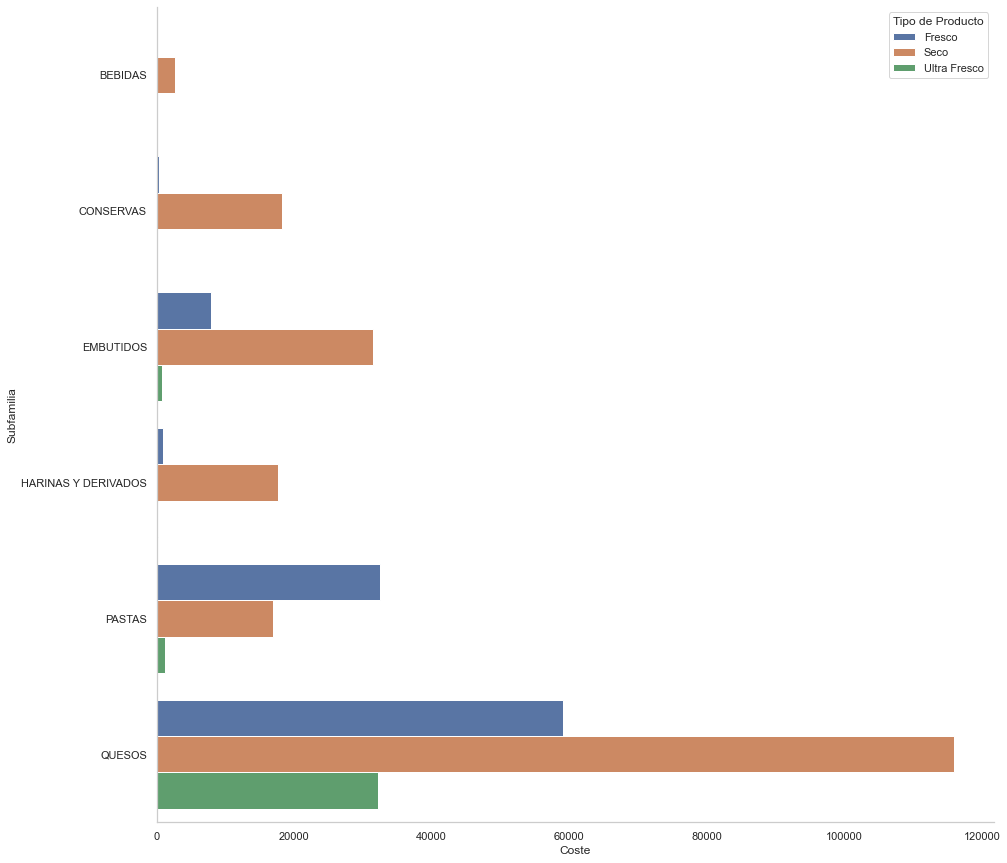

In [64]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_tot= df_high_disc.groupby(['Tipo de Producto', 'Descripcion Familia de Articulo']).apply(
        lambda x: x['Total Producto (Cantidad x Precio x Dto)'].sum()).reset_index()

ax = sns.barplot(data=df_high_tot, x=0, y='Descripcion Familia de Articulo', hue='Tipo de Producto')

ax.set_xlabel("Coste")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

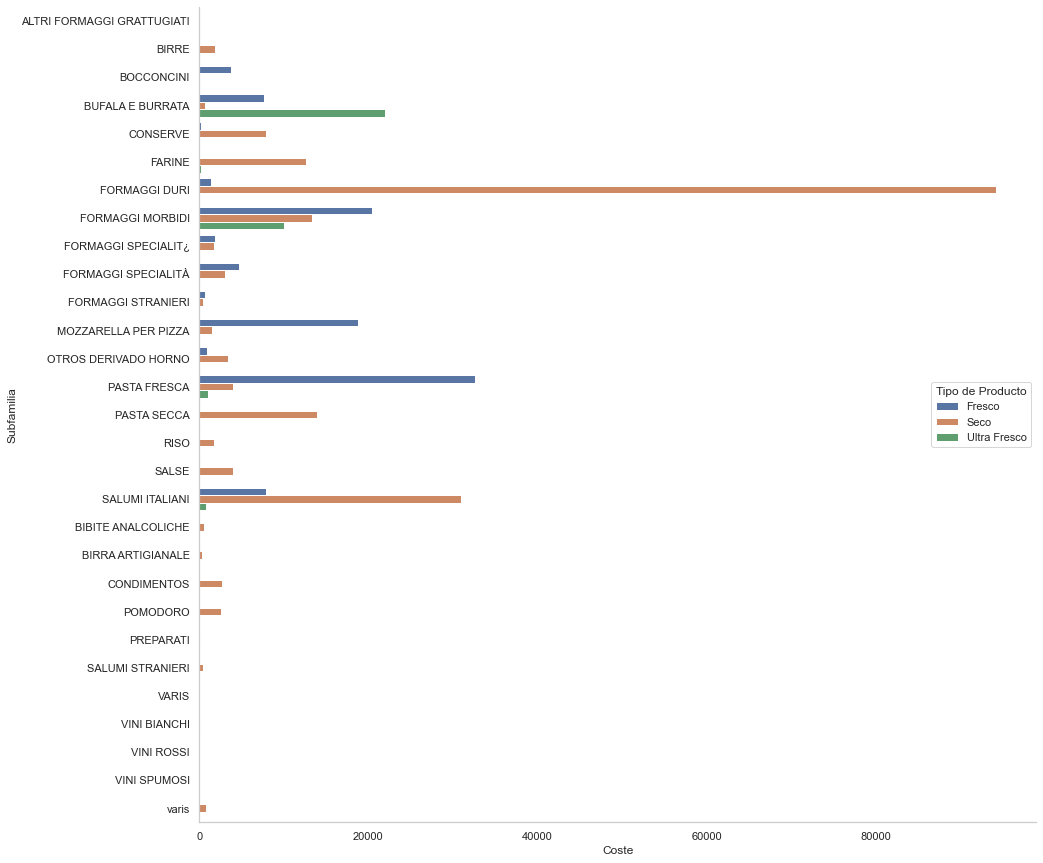

In [65]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_tot= df_high_disc.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Total Producto (Cantidad x Precio x Dto)'].sum()).reset_index()

ax = sns.barplot(data=df_high_tot, x=0, y='Descripcion Sub-Familia Articulos', hue='Tipo de Producto')

ax.set_xlabel("Coste")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [69]:
max_business_repercusion_percentage = df_high_disc['Total Producto (Cantidad x Precio x Dto)'].sum() / df['Total Producto (Cantidad x Precio x Dto)'].sum()

In [77]:
print( 'This is the max monetary impact we can directly have:', np.int(df_high_disc['Total Producto (Cantidad x Precio x Dto)'].sum()), 'Euros')

This is the max monetary impact we can directly have: 338046 Euros


Select products that have the biggest monetary impact

In [80]:
formaggi_duri = df[df['Descripcion Sub-Familia Articulos'] == 'FORMAGGI DURI']
bufala_e_burrata = df[df['Descripcion Sub-Familia Articulos'] == 'BUFALA E BURRATA']
pasta_fresca = df[df['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA']
salumi_italiani = df[df['Descripcion Sub-Familia Articulos'] == 'SALUMI ITALIANI']
formaggi_morbidi = df[df['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']
mozzarella_per_pizza = df[df['Descripcion Sub-Familia Articulos'] == 'MOZZARELLA PER PIZZA']

FORMAGGI DURI


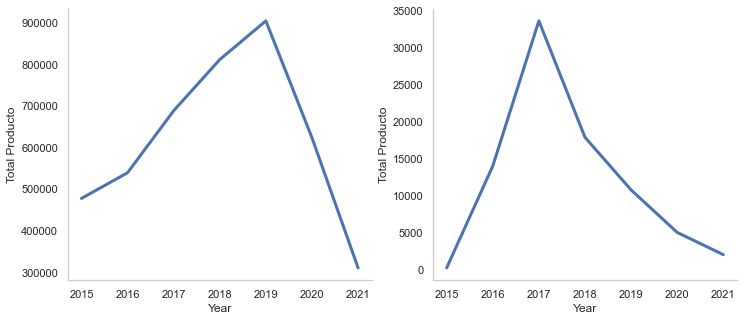

BUFALA E BURRATA


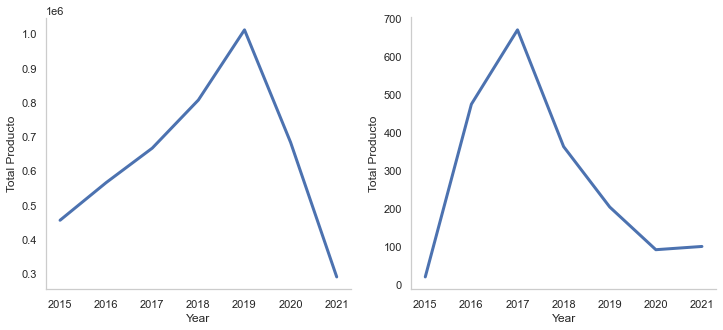

PASTA FRESCA


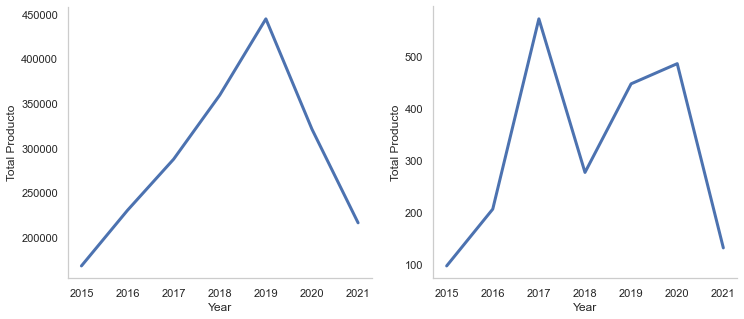

SALUMI ITALIANI


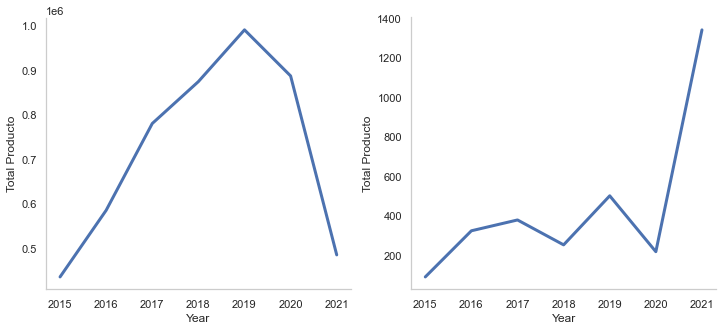

FORMAGGI MORBIDI


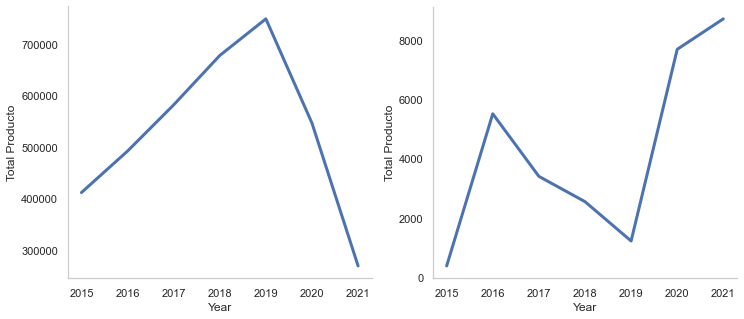

MOZZARELLA PER PIZZA


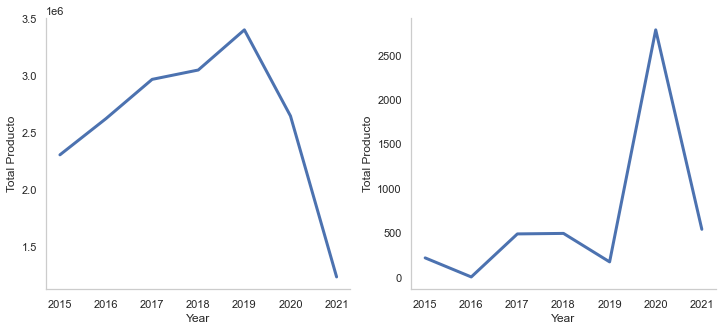

In [102]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(12, 5), facecolor='white', nrows=1, ncols=2)

    df_tot = el.groupby(['year']).apply(
            lambda x: x['Total Producto (Cantidad x Precio x Dto)'].sum()).reset_index()

    df_tot_dis = el_dis.groupby(['year']).apply(
            lambda x: x['Total Producto (Cantidad x Precio x Dto)'].sum()).reset_index()

    ax[0].plot(df_tot['year'].values, df_tot[0].values, lw=3)
    ax[1].plot(df_tot_dis['year'].values, df_tot_dis[0].values, lw=3)

    for el in [0, 1]:
        ax[el].set_ylabel("Total Producto")
        ax[el].set_xlabel("Year")
        ax[el].grid(False)
        ax[el].spines['top'].set_visible(False)
        ax[el].spines['right'].set_visible(False)
    plt.show()